In [1]:
import sys
from dotenv import load_dotenv
import os
from joblib import Parallel, delayed

In [2]:
sys.path.append("../helpers")
from audio_process import AudioProcess
from ProjectData import ProjectData
from audio_visualization import show_mfcc_from_json, show_melspectrogram_from_json

# Load environment variable
sampling rate

In [3]:
load_dotenv()
SAMPLING_RATE = int(os.getenv("SAMPLING_RATE"))

# Create ProjectData object

In [4]:
projectData = ProjectData()

# Get auido paths 

In [5]:
audioPaths = projectData.get_audio_paths()

# Loop thought audio files, create and save the data

Create melSpectrograms and mfcc with augmented data

In [6]:
def process_audio(path, key, sampling_rate):
    audio = AudioProcess(audio_path=path, class_name=key, sampling_rate=sampling_rate)
    audio.add_original_data()
    audio.add_noise_data()
    audio.add_echo()
    audio.add_frequency_filter_data()
    audio.add_delay_data()
    audio.add_reverb_data()
    audio.save_data()

In [7]:
process_num = len(Parallel(n_jobs=-1)(
    delayed(process_audio)(path, key, SAMPLING_RATE)
    for key in audioPaths.keys()
    for path in audioPaths[key]
))
print(f"Processed {process_num} audio files")

Processed 999 audio files


# Show examples

Get data paths and labels

In [28]:
data_paths_len = len(projectData.get_data_paths()["melSpectrogram_mfcc"])
print("Data paths length:", data_paths_len)

Data paths length: 5994


In [34]:
example_data = projectData.get_data_paths(
    indexes=range(0, data_paths_len, 600)
)
map_labels = {i: key for i, key in enumerate(audioPaths.keys())}

## Show MelSpectrograms

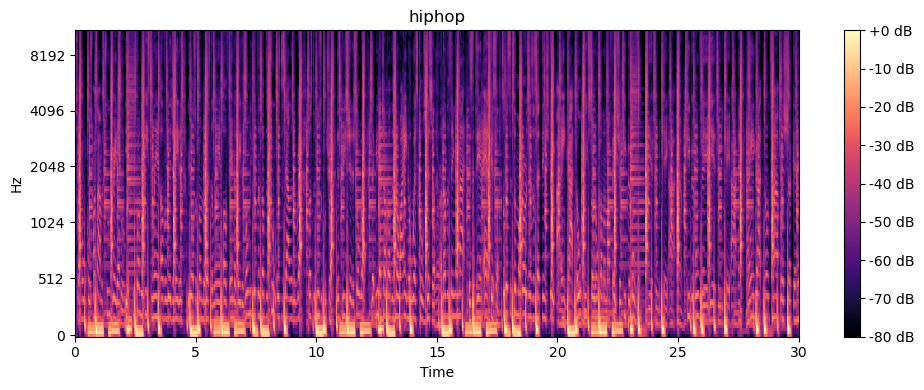

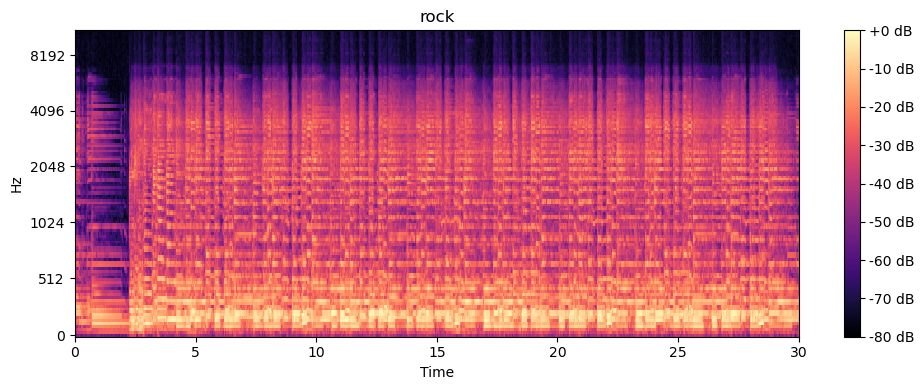

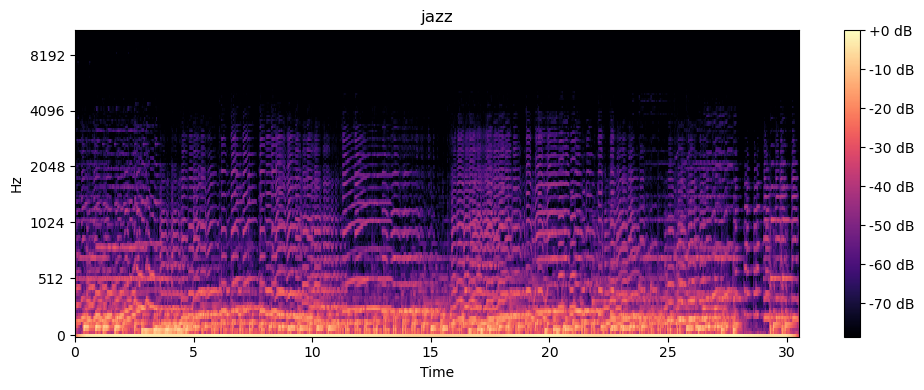

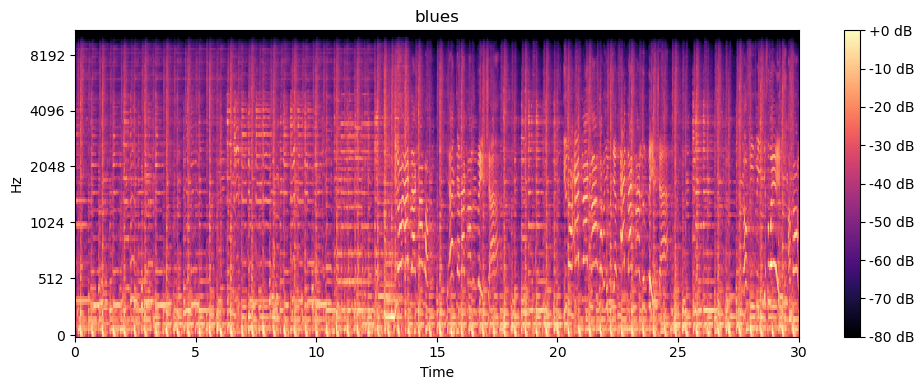

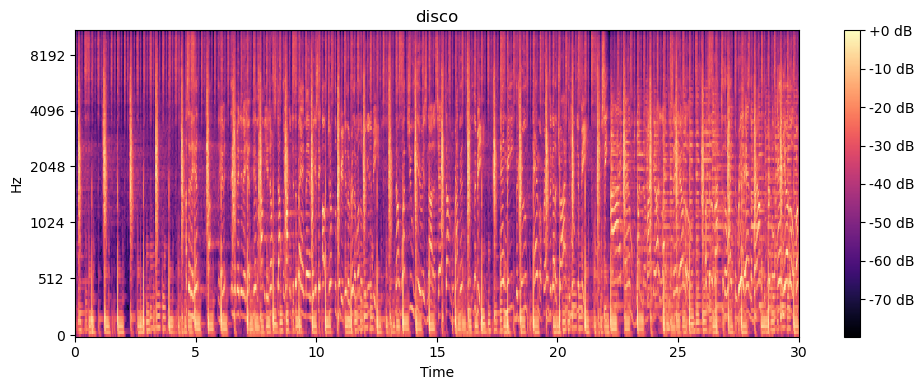

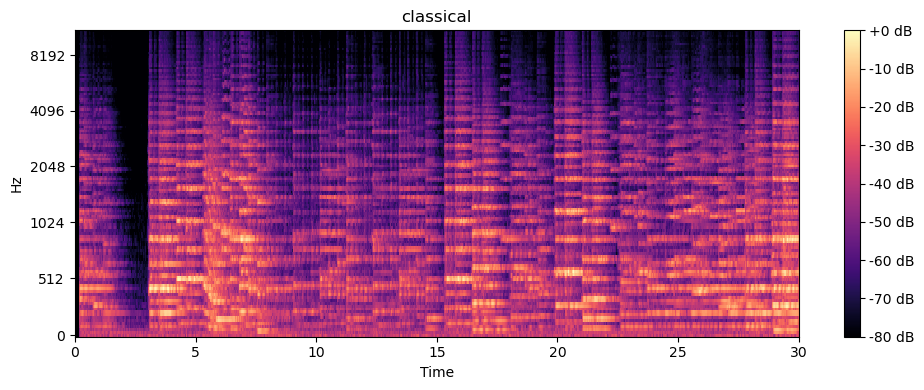

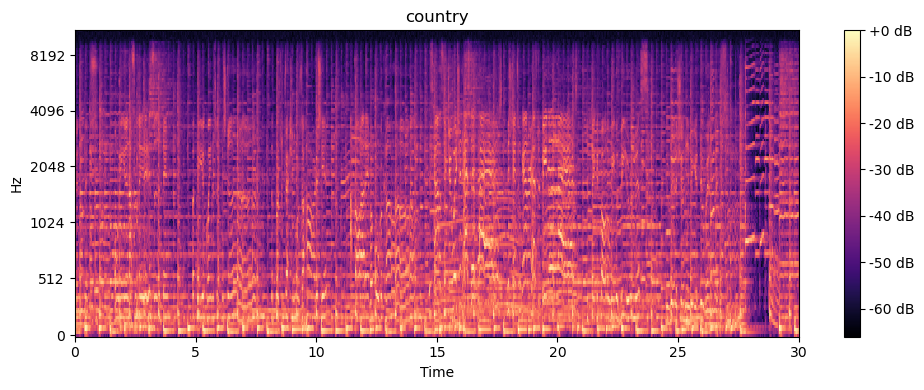

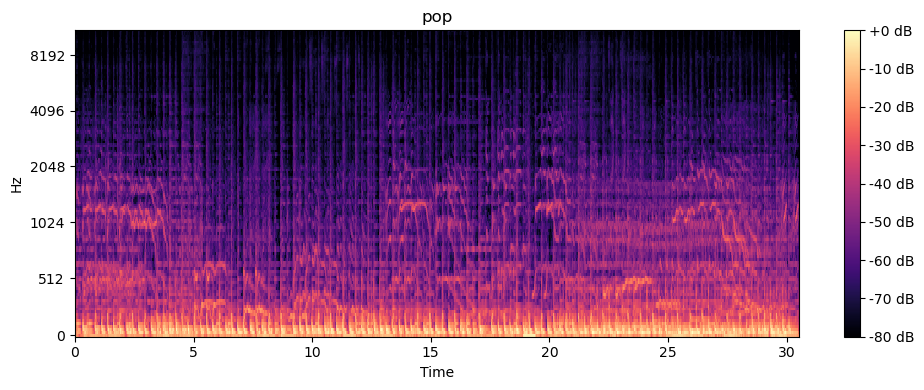

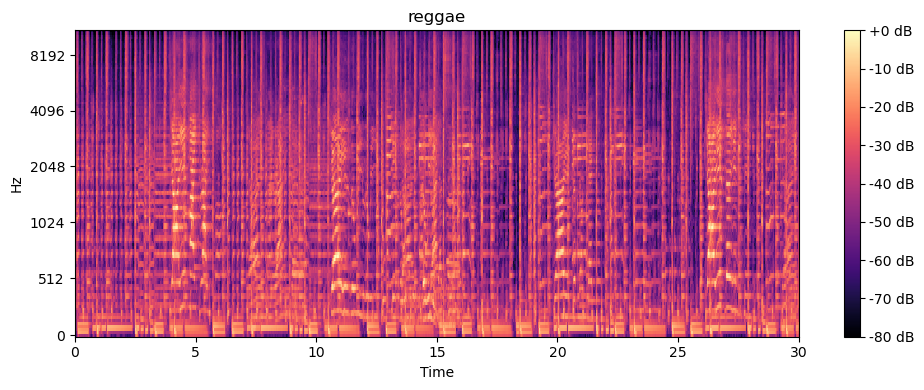

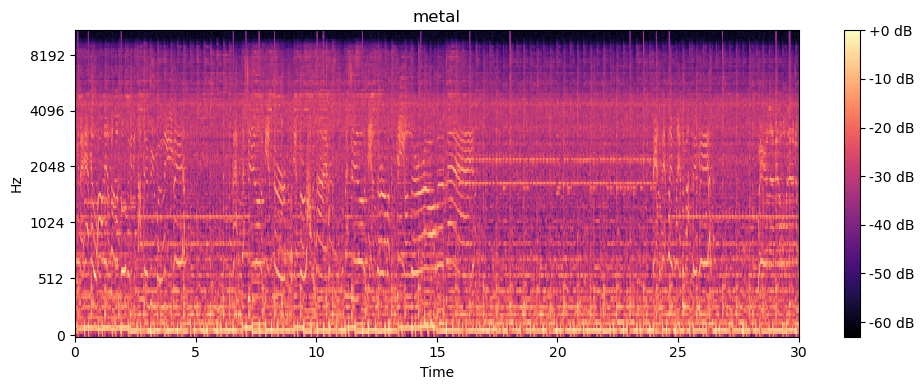

In [35]:
for item in example_data["melSpectrogram_mfcc"]:
    key, path = list(item.items())[0]
    show_melspectrogram_from_json(
        json_file_path=path, sampling_rate=SAMPLING_RATE, title=map_labels[key]
    )

## Show mfccs

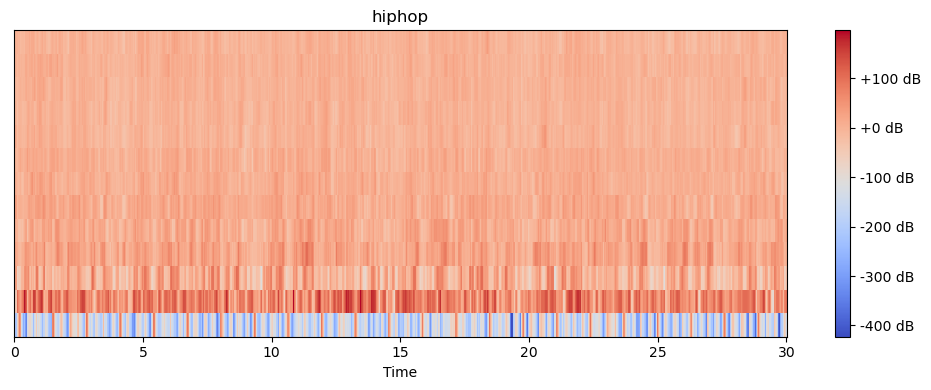

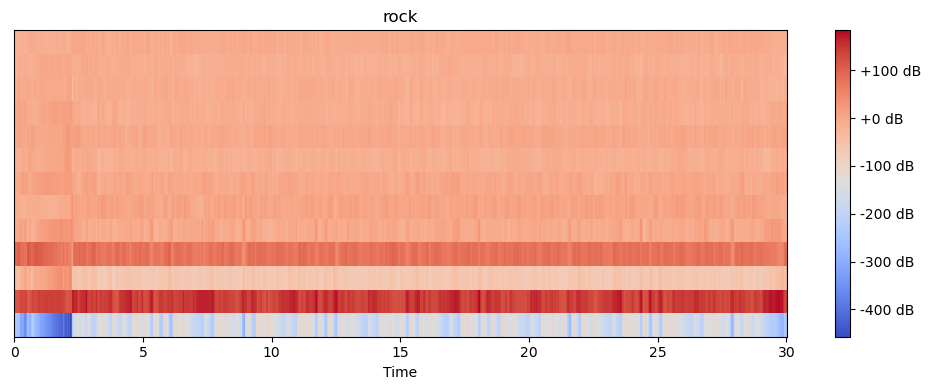

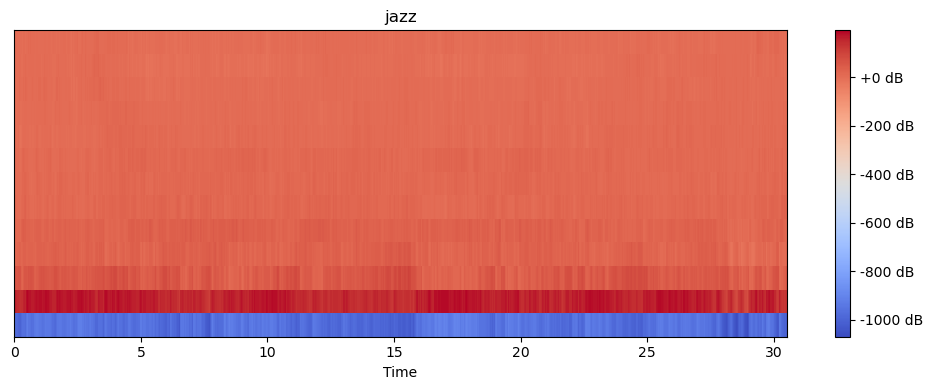

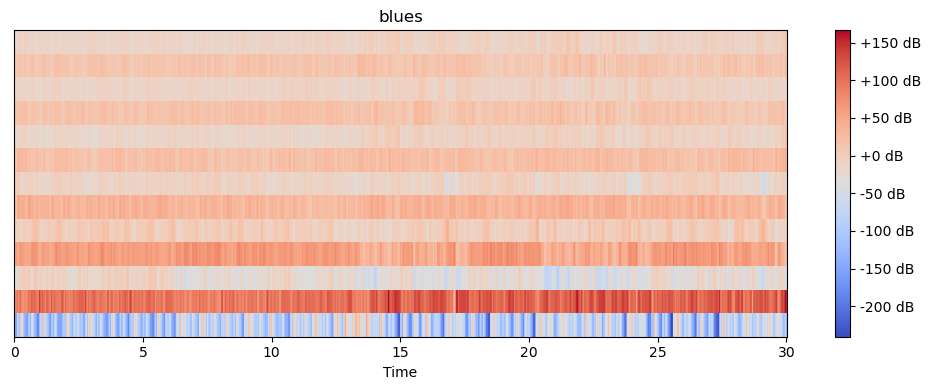

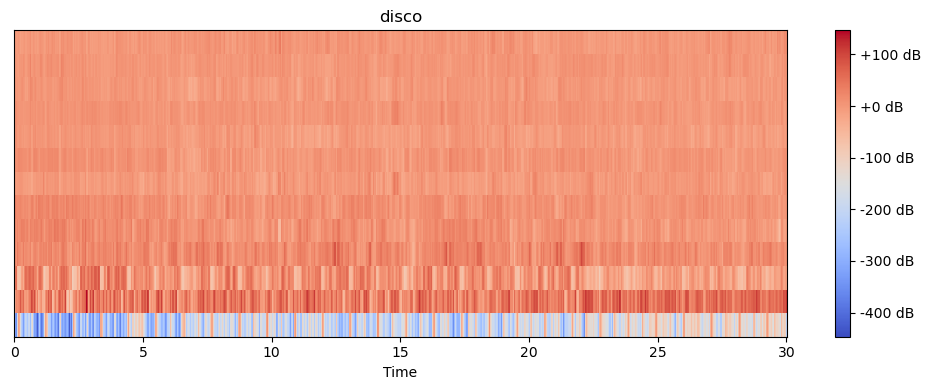

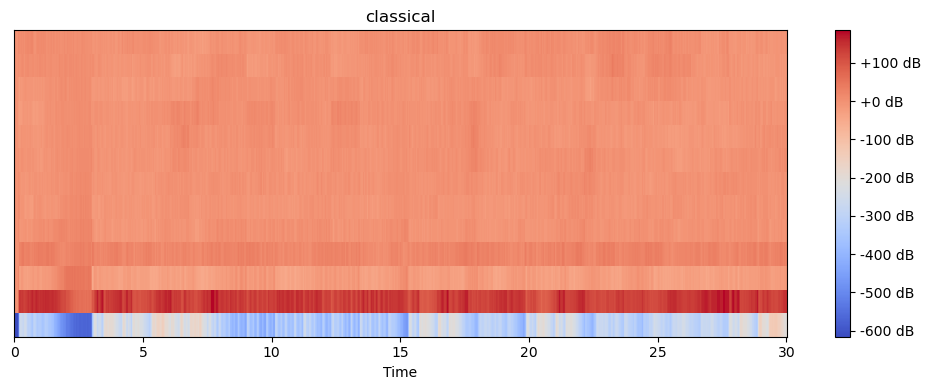

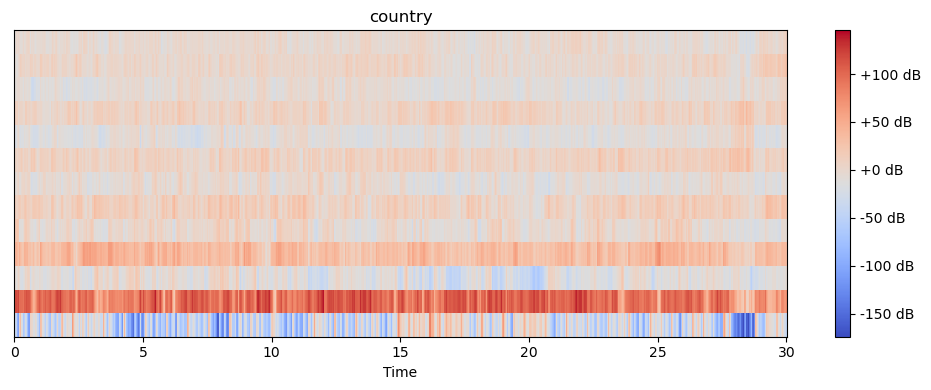

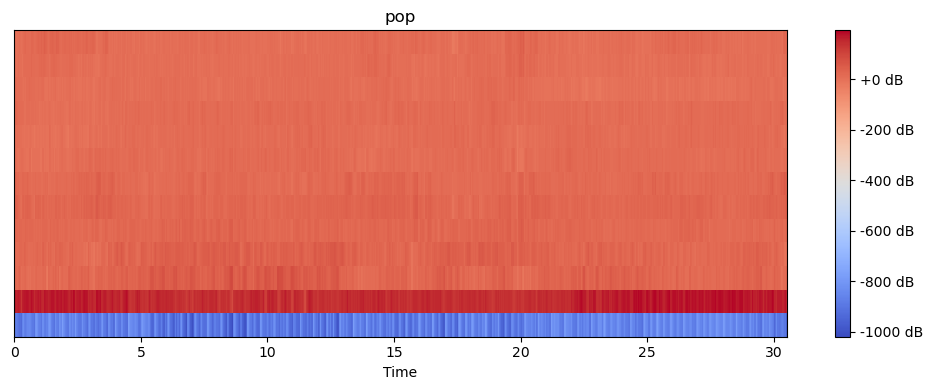

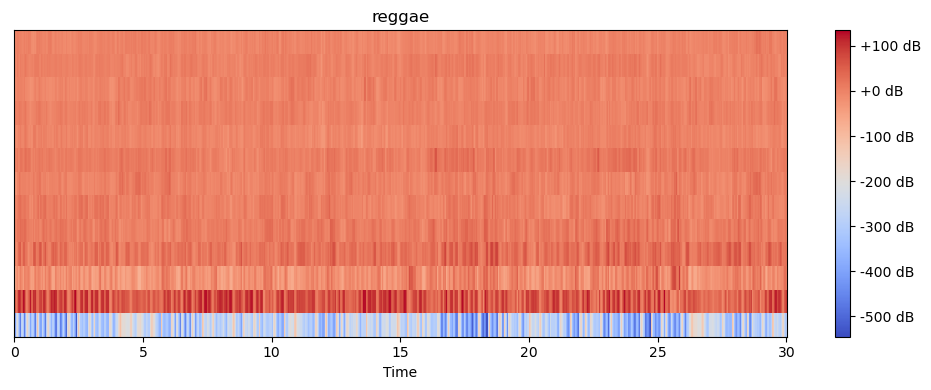

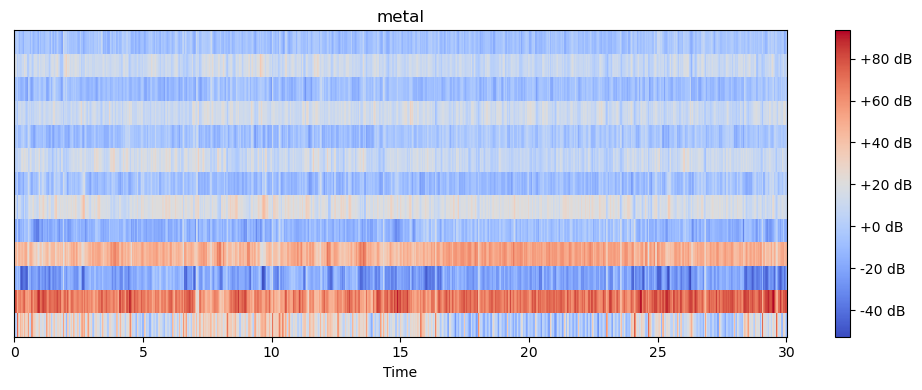

In [26]:
for item in example_data["melSpectrogram_mfcc"]:
    key, path = list(item.items())[0]
    show_mfcc_from_json(
        json_file_path=path, sampling_rate=SAMPLING_RATE, title=map_labels[key]
    )